## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read in data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('resouces/titanic.csv')
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket','Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


### Explore continuous features

In [7]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [8]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Plot continuous features
with this plots we can tell that fare had an impact on survival 

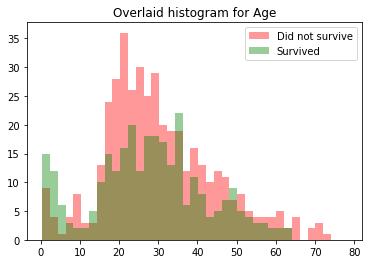

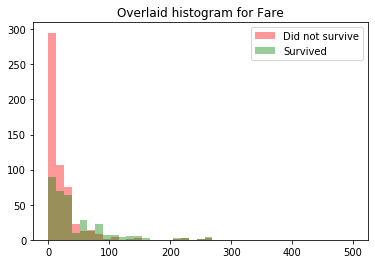

In [9]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

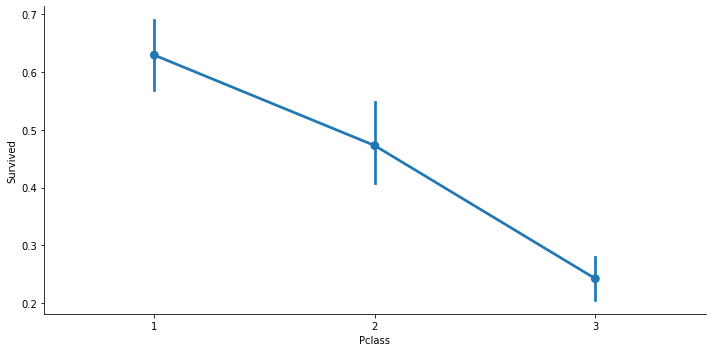

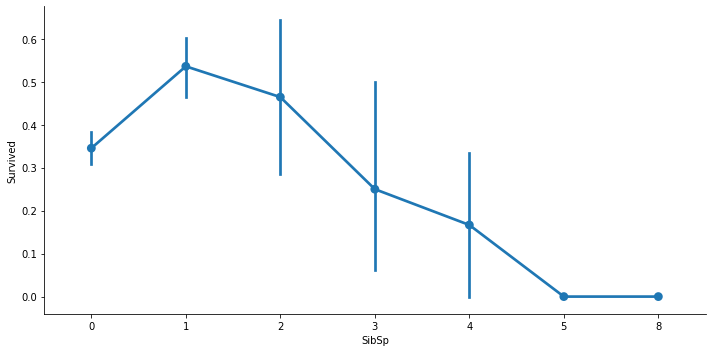

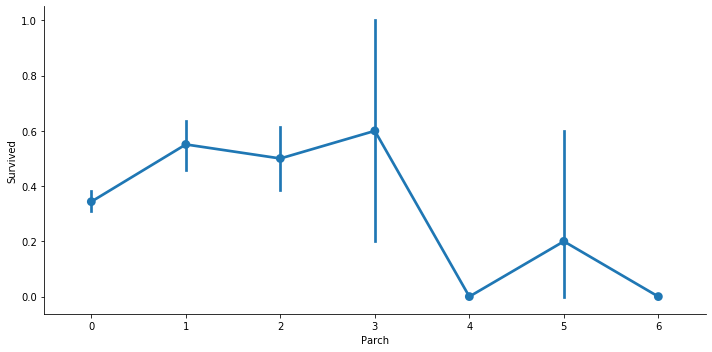

In [9]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

### Joining SibSp and Parch to make 
to make the data clean and have a better understnading of family count and impact on the survival rate we join the SibSp and Parch together so we drop SibSp and Parch and add a col named family_cnt to the Dataframe

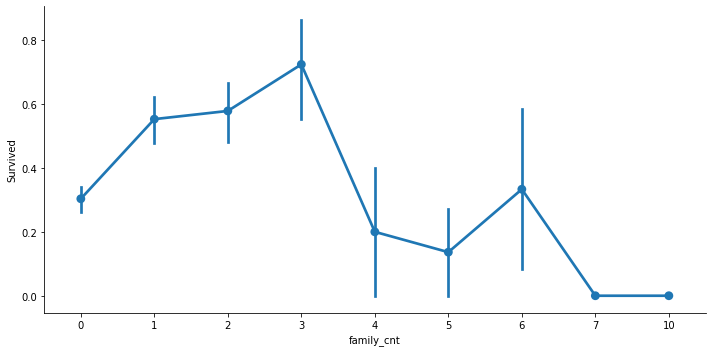

In [10]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['Parch','SibSp'], axis=1, inplace=True)
sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)

### Dealing With Age and missing rows 

In [11]:
titanic.groupby(titanic['Age'].isnull()).mean()


,Survived,Pclass,Age,Fare,family_cnt
Age,,,,,
False,0.406162,2.236695,29.699118,34.694514,0.943978
True,0.293785,2.598870,NaN,22.158567,0.745763


In [12]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Cabin         687
family_cnt      0
dtype: int64

### Dealing with cabin 

In [13]:
titanic.groupby(titanic['Cabin'].isnull()).mean()
#variables of cabins missing are not random and not having a cabin had an effect on the surviva rate 

,Survived,Pclass,Age,Fare,family_cnt
Cabin,,,,,
False,0.666667,1.196078,35.258349,76.141504,0.877451
True,0.299854,2.639010,28.048341,19.157325,0.912664


In [14]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.drop('Cabin', axis=1, inplace=True)


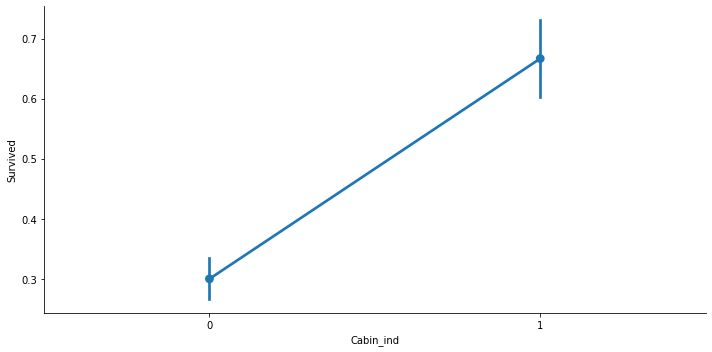

In [60]:
sns.catplot(x='Cabin_ind', y='Survived', data=titanic, kind='point', aspect=2, )

### Dealing with Sex of passangers 


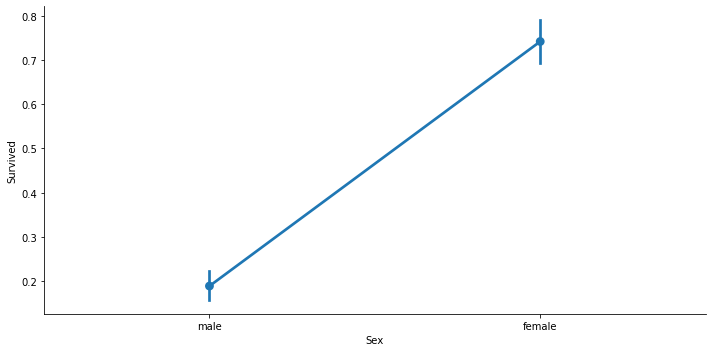

In [15]:
sns.catplot(x='Sex', y='Survived', data=titanic, kind='point', aspect=2, )


In [16]:
#conver sex to numeric 
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)


In [17]:
# now our data is clean for modeling 
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [20]:
titanic.to_csv('resouces/titanic_cleaned.csv')

### file is saved in folder as titanic_cleaned.csv